In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import pickle
import joblib

In [4]:
df90=pd.read_csv(r"D:\projectyoutube\singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df90

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [5]:
df20=pd.read_csv(r"D:\projectyoutube\singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df20

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [6]:
df12=pd.read_csv(r"D:\projectyoutube\singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df12

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [7]:
df15=pd.read_csv(r"D:\projectyoutube\singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df15

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [8]:
df17=pd.read_csv(r"D:\projectyoutube\singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df17

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
185131,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 01 month,865000.0
185132,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,63 years 01 month,880000.0
185133,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
185134,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0


In [9]:
print(df90.info(),df20.info(),df12.info(),df15.info(),df17.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 

In [10]:
df17['remaining_lease'] = df17['remaining_lease'].str.split(' ').str[0].astype('int64')
df17['remaining_lease']

0         61
1         60
2         62
3         62
4         62
          ..
185131    63
185132    63
185133    60
185134    60
185135    60
Name: remaining_lease, Length: 185136, dtype: int64

In [11]:
df = pd.concat([df90, df20, df12, df15, df17], ignore_index=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931339 entries, 0 to 931338
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                931339 non-null  object 
 1   town                 931339 non-null  object 
 2   flat_type            931339 non-null  object 
 3   block                931339 non-null  object 
 4   street_name          931339 non-null  object 
 5   storey_range         931339 non-null  object 
 6   floor_area_sqm       931339 non-null  float64
 7   flat_model           931339 non-null  object 
 8   lease_commence_date  931339 non-null  int64  
 9   resale_price         931339 non-null  float64
 10  remaining_lease      222289 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.2+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  

In [12]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
931334,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.0
931335,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,880000.0,63.0
931336,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.0
931337,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.0


In [13]:
df = df.drop_duplicates()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
931334,2024-07,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.0
931335,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,880000.0,63.0
931336,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.0
931337,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929374 entries, 0 to 931338
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929374 non-null  object 
 1   town                 929374 non-null  object 
 2   flat_type            929374 non-null  object 
 3   block                929374 non-null  object 
 4   street_name          929374 non-null  object 
 5   storey_range         929374 non-null  object 
 6   floor_area_sqm       929374 non-null  float64
 7   flat_model           929374 non-null  object 
 8   lease_commence_date  929374 non-null  int64  
 9   resale_price         929374 non-null  float64
 10  remaining_lease      221911 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 85.1+ MB


type converion of month column

In [15]:
df['month']=pd.to_datetime(df['month'],format="%Y-%m")
#split the month column by year and month
df['year']=df['month'].dt.year
df['month']=df['month'].dt.month

C:\Users\aarun\AppData\Local\Temp\ipykernel_25652\2432699629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=pd.to_datetime(df['month'],format="%Y-%m")
C:\Users\aarun\AppData\Local\Temp\ipykernel_25652\2432699629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['month'].dt.year
C:\Users\aarun\AppData\Local\Temp\ipykernel_25652\2432699629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [16]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929374 entries, 0 to 931338
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929374 non-null  int32  
 1   town                 929374 non-null  object 
 2   flat_type            929374 non-null  object 
 3   block                929374 non-null  object 
 4   street_name          929374 non-null  object 
 5   storey_range         929374 non-null  object 
 6   floor_area_sqm       929374 non-null  float64
 7   flat_model           929374 non-null  object 
 8   lease_commence_date  929374 non-null  int64  
 9   resale_price         929374 non-null  float64
 10  remaining_lease      221911 non-null  float64
 11  year                 929374 non-null  int32  
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 85.1+ MB


In [18]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707463
year                        0
dtype: int64

remaining lease to be filled

In [19]:
df['year'] - df['lease_commence_date']

0         13
1         13
2         13
3         13
4         14
          ..
931334    36
931335    36
931336    39
931337    39
931338    39
Length: 929374, dtype: int64

In [20]:
df['remaining_lease'].fillna(99 - (df['year'] - df['lease_commence_date']), inplace=True)
df['remaining_lease'].unique()

C:\Users\aarun\AppData\Local\Temp\ipykernel_25652\3719359259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['remaining_lease'].fillna(99 - (df['year'] - df['lease_commence_date']), inplace=True)
C:\Users\aarun\AppData\Local\Temp\ipykernel_25652\3719359259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remaining_lease'].fillna(

array([ 86.,  85.,  87.,  88.,  93.,  89.,  94.,  90.,  91.,  95.,  81.,
        92.,  82.,  78.,  84.,  80.,  83.,  76.,  79.,  77.,  97.,  96.,
        98.,  75., 100.,  99.,  74.,  73.,  72., 101.,  71.,  70.,  69.,
        68.,  67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,
        57.,  56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,
        46.,  45.,  44.,  43.,  42.,  41.])

In [21]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

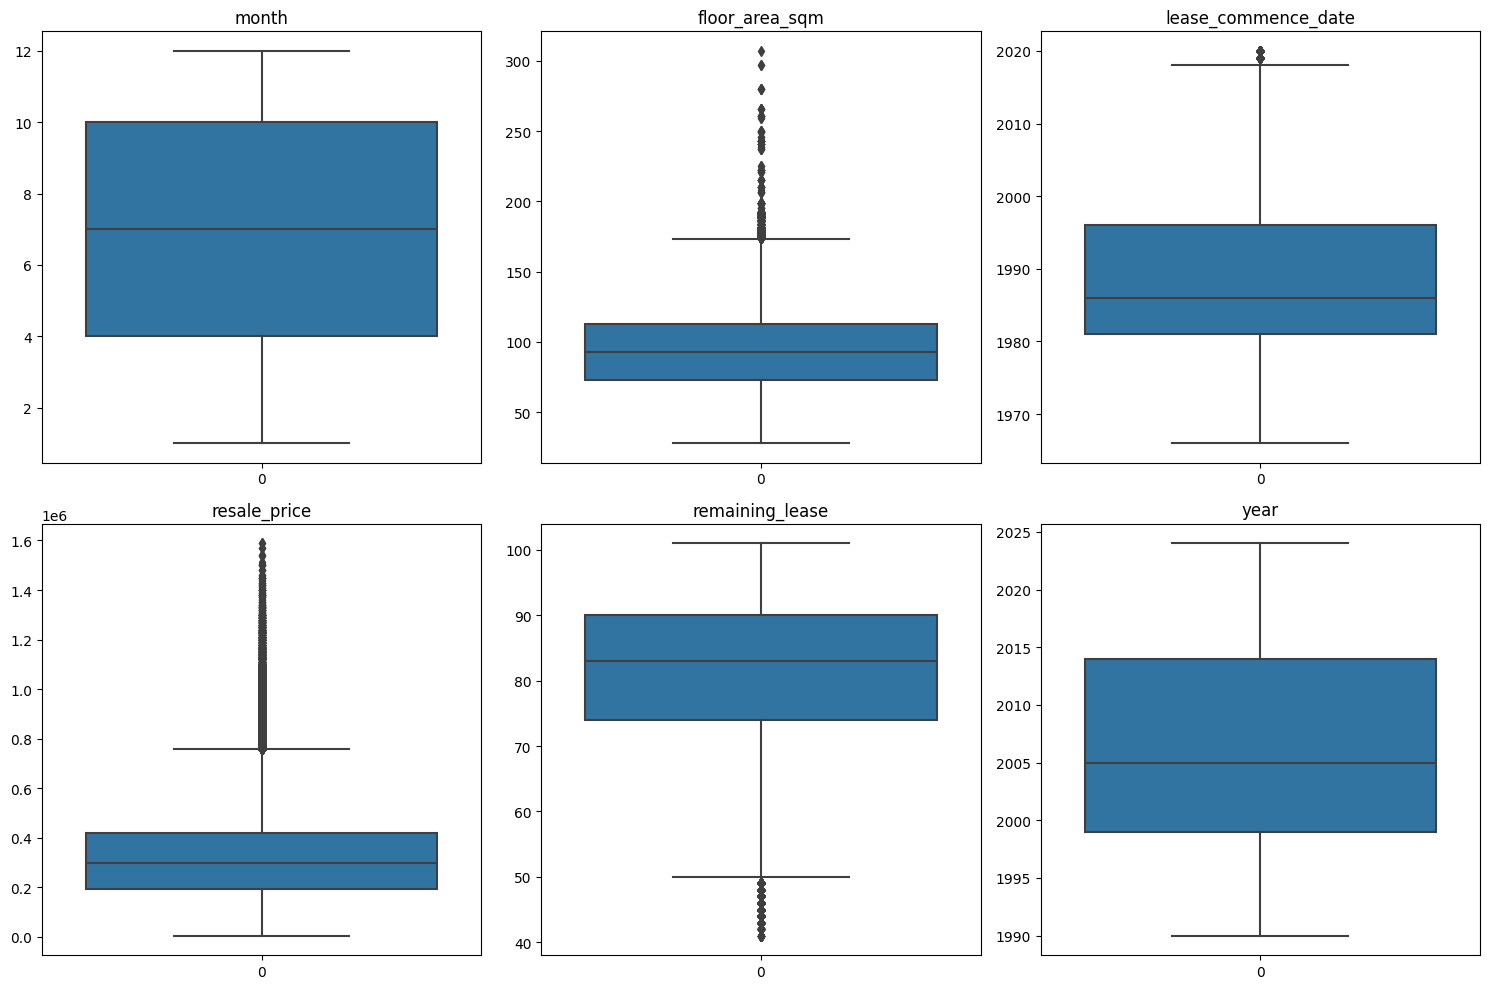

In [22]:
#Plotting the boxplot of numerical columns to check outliers
raw_numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in raw_numerical_columns]

nc_df = df
num_plots = len(numerical_columns)
num_cols = min(num_plots, 3)  
num_rows = (num_plots - 1) // num_cols + 1 if num_plots > 1 else 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(numerical_columns):
    sns.boxplot(nc_df[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show(fig)

In [23]:
df1=df.copy()
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
931334,7,YISHUN,EXECUTIVE,352,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,865000.0,63.0,2024
931335,7,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,880000.0,63.0,2024
931336,7,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,770000.0,60.0,2024
931337,7,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,800000.0,60.0,2024


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(df1['town'].unique())
# Encode labels in column 'encoded_Occupation'. 
df1['encoded_town']= le.fit_transform(df1['town'])

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']


In [25]:
le = preprocessing.LabelEncoder()
print(df1['flat_type'].unique())
# Encode labels in column 'encoded_Occupation'. 
df1['encoded_flat_type']= le.fit_transform(df1['flat_type'])

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']


In [26]:
le = preprocessing.LabelEncoder()
print(df1['street_name'].unique())
# Encode labels in column 'encoded_Occupation'. 
df1['encoded_street_name']= le.fit_transform(df1['street_name'])

['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNFU RD'
 'BT BATOK ST 11' 'BT BATOK WEST AVE 8' 'BT BATOK WEST AVE 6'
 'BT BATOK ST 21' 'BT BATOK EAST AVE 5' 'BT BATOK EAST AVE 4'
 'HILLVIEW AVE' 'BT BATOK CTRL' 'BT BATOK ST 31' 'BT BATOK EAST AVE 3'
 'TAMAN HO SWEE' 'TELOK BLANGAH CRES' 'BEO CRES' 'TELOK BLANGAH DR'
 'DEPOT RD' 'TELOK BLANGAH RISE' 'JLN BT MERAH' 'HENDERSON RD' 'INDUS RD'
 'BT MERAH VIEW' 'HENDERSON CRES' 'BT PURMEI RD' 'TELOK BLANGAH HTS'
 'EVERTON PK' 'KG BAHRU HILL' 'REDHILL CL' 'HOY FATT RD' 'HAVELOCK RD'
 'JLN K

In [27]:
le = preprocessing.LabelEncoder()
print(df1['storey_range'].unique())
# Encode labels in column 'encoded_Occupation'. 
df1['encoded_storey_range']= le.fit_transform(df1['storey_range'])

['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20'
 '21 TO 25' '26 TO 30' '36 TO 40' '31 TO 35' '46 TO 48' '43 TO 45'
 '49 TO 51']


In [28]:
le = preprocessing.LabelEncoder()
print(df1['flat_model'].unique())
# Encode labels in column 'encoded_Occupation'. 
df1['encoded_flat_model']= le.fit_transform(df1['flat_model'])

['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT' 'Improved'
 'New Generation' 'Model A' 'Standard' 'Apartment' 'Simplified'
 'Model A-Maisonette' 'Maisonette' 'Multi Generation' 'Adjoined flat'
 'Premium Apartment' 'Terrace' 'Improved-Maisonette' 'Premium Maisonette'
 '2-room' 'Model A2' 'DBSS' 'Type S1' 'Type S2' 'Premium Apartment Loft'
 '3Gen']


In [55]:
numerical_columns1 = df1.select_dtypes(include=['number'])
corr1=numerical_columns1.corr()
corr1["resale_price"]


month                   0.005084
floor_area_sqm          0.571616
lease_commence_date     0.544968
resale_price            1.000000
remaining_lease        -0.064200
year                    0.685968
encoded_town            0.063567
encoded_flat_type       0.597183
encoded_street_name     0.036084
encoded_storey_range    0.201221
encoded_flat_model     -0.194280
Name: resale_price, dtype: float64

Important Feature columns are floor area,lease commence date, year, flat type, flat story range, flat model

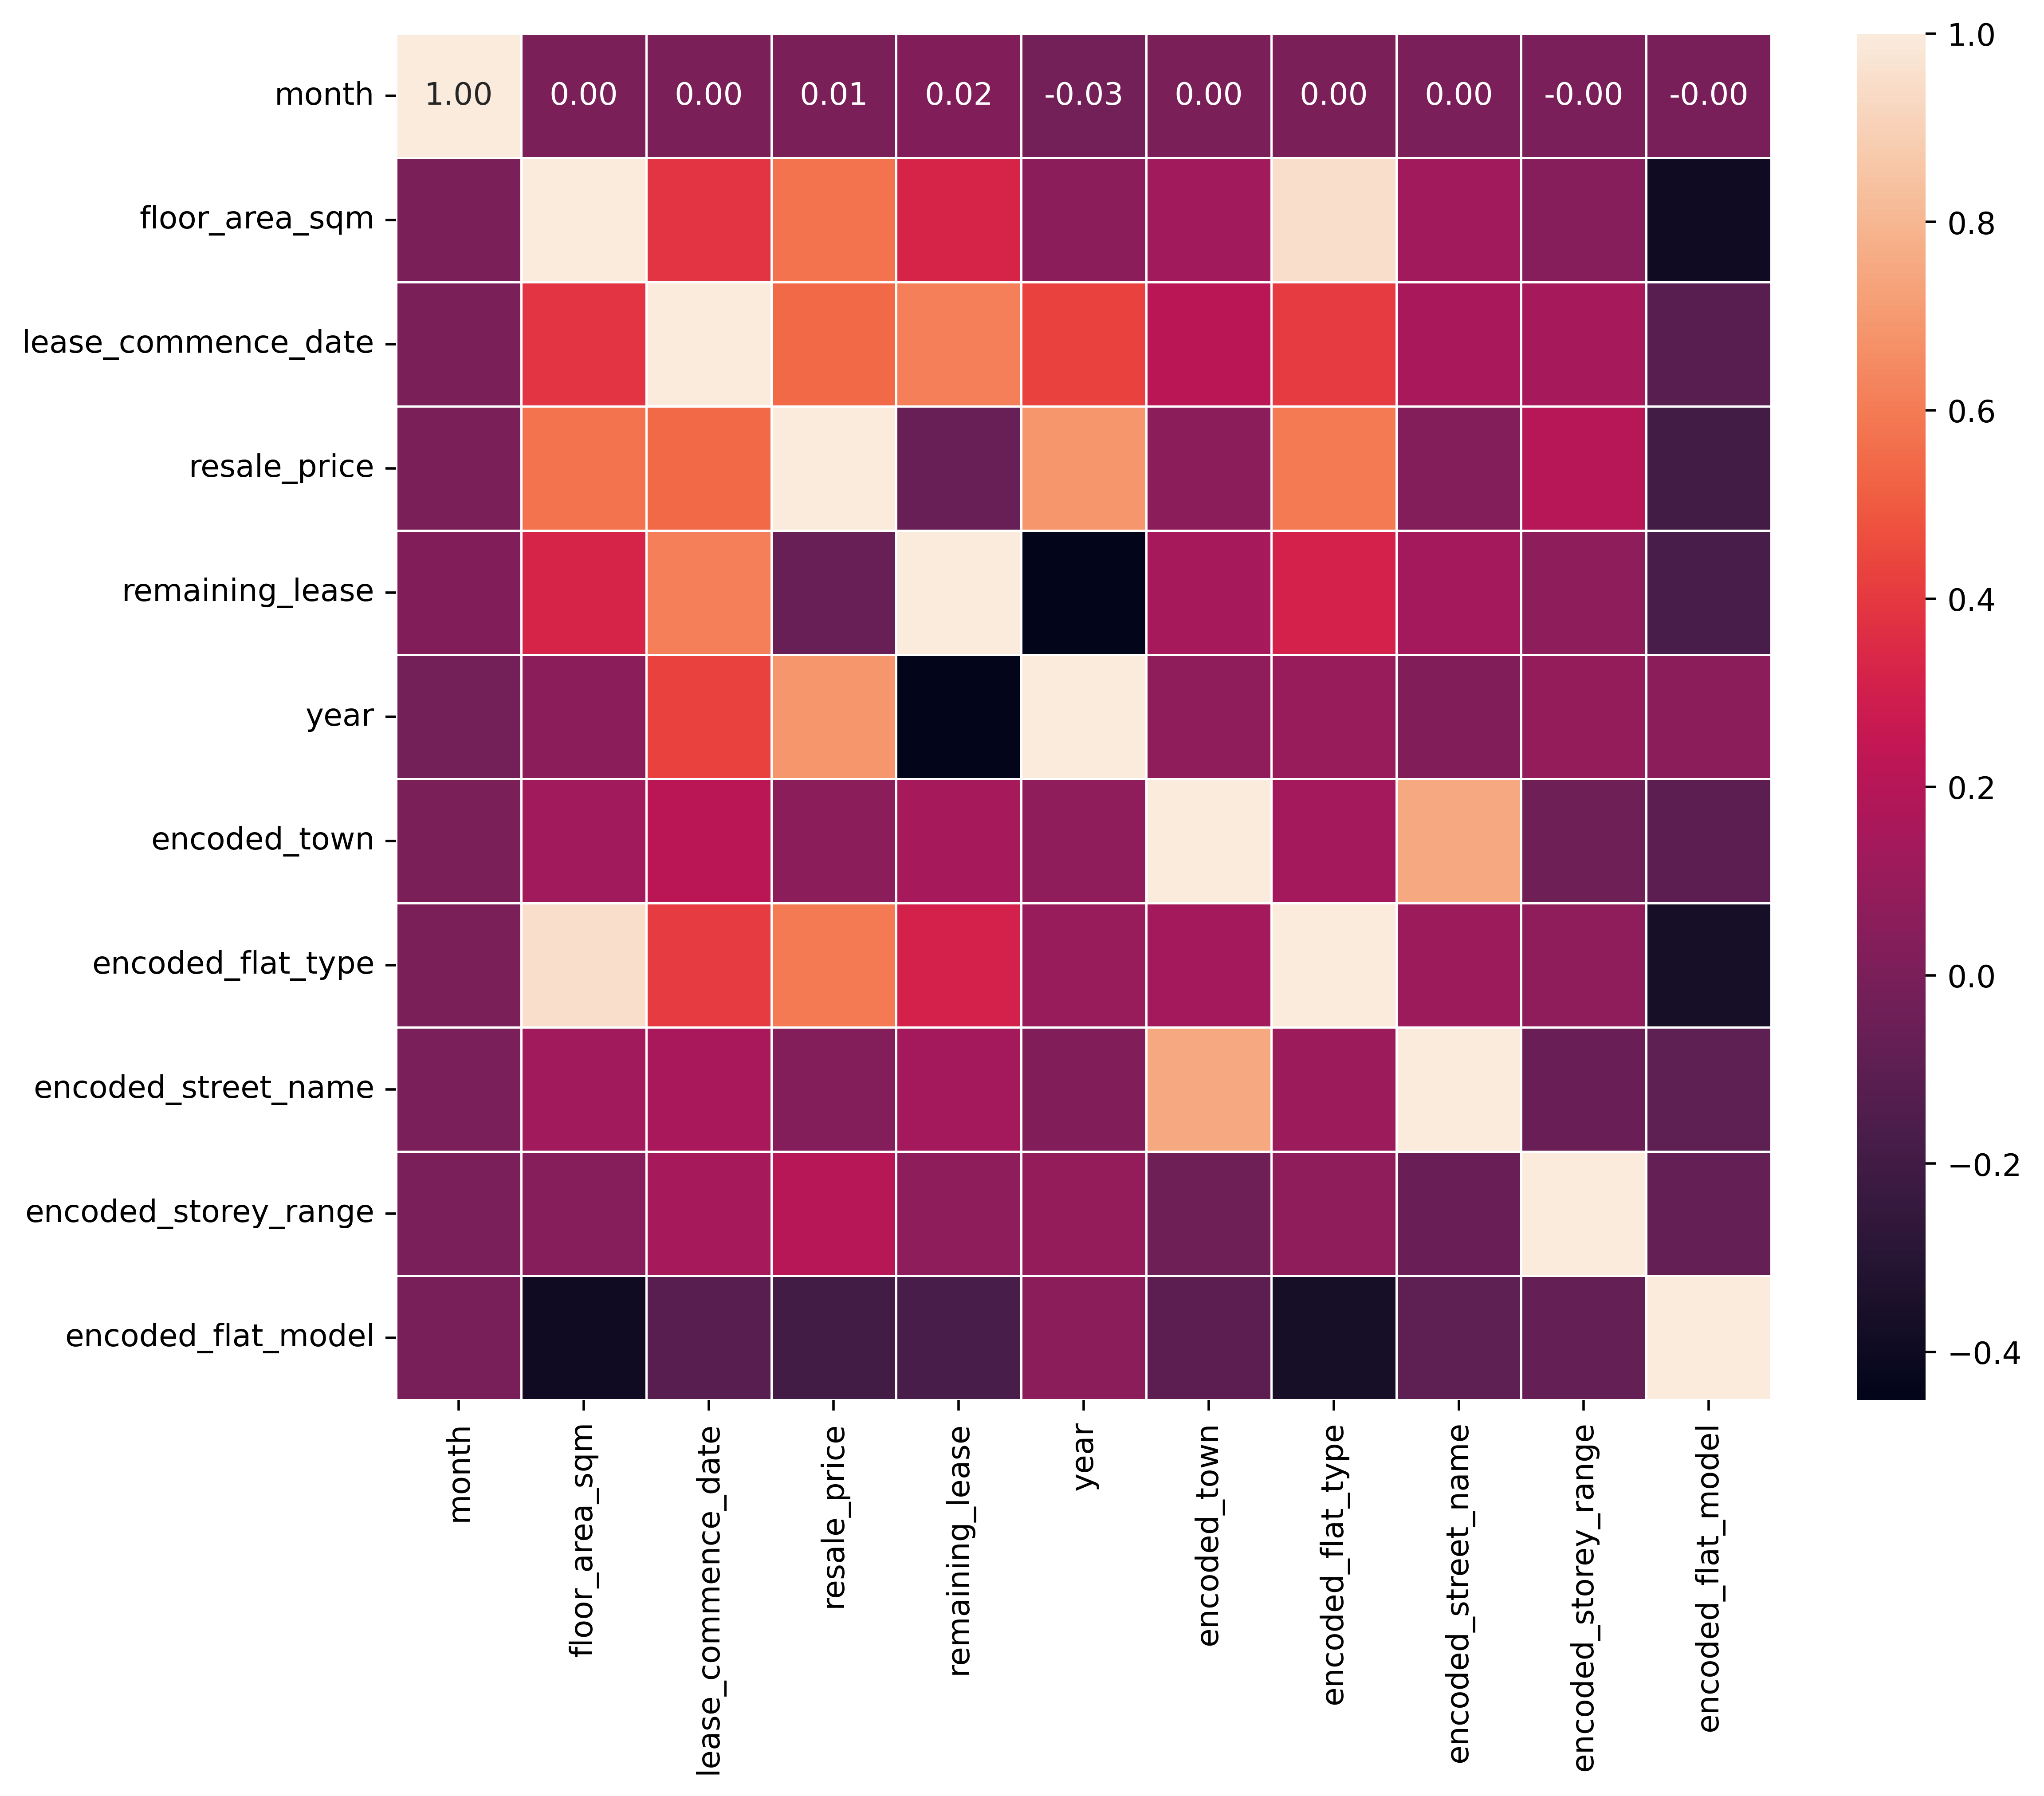

In [56]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr1,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [31]:
numerical_columns1

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,encoded_town,encoded_flat_type,encoded_street_name,encoded_storey_range,encoded_flat_model
0,1,31.0,1977,9000.0,86.0,1990,0,0,13,5,7
1,1,31.0,1977,6000.0,86.0,1990,0,0,13,2,7
2,1,31.0,1977,8000.0,86.0,1990,0,0,13,5,7
3,1,31.0,1977,6000.0,86.0,1990,0,0,13,4,7
4,1,73.0,1976,47200.0,85.0,1990,0,2,13,2,20
...,...,...,...,...,...,...,...,...,...,...,...
931334,7,146.0,1988,865000.0,63.0,2024,26,5,563,2,15
931335,7,145.0,1988,880000.0,63.0,2024,26,5,563,5,5
931336,7,146.0,1985,770000.0,60.0,2024,26,5,567,0,15
931337,7,146.0,1985,800000.0,60.0,2024,26,5,567,2,15


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [33]:
numerical_columns1["resale_price"]

0           9000.0
1           6000.0
2           8000.0
3           6000.0
4          47200.0
            ...   
931334    865000.0
931335    880000.0
931336    770000.0
931337    800000.0
931338    775000.0
Name: resale_price, Length: 929374, dtype: float64

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

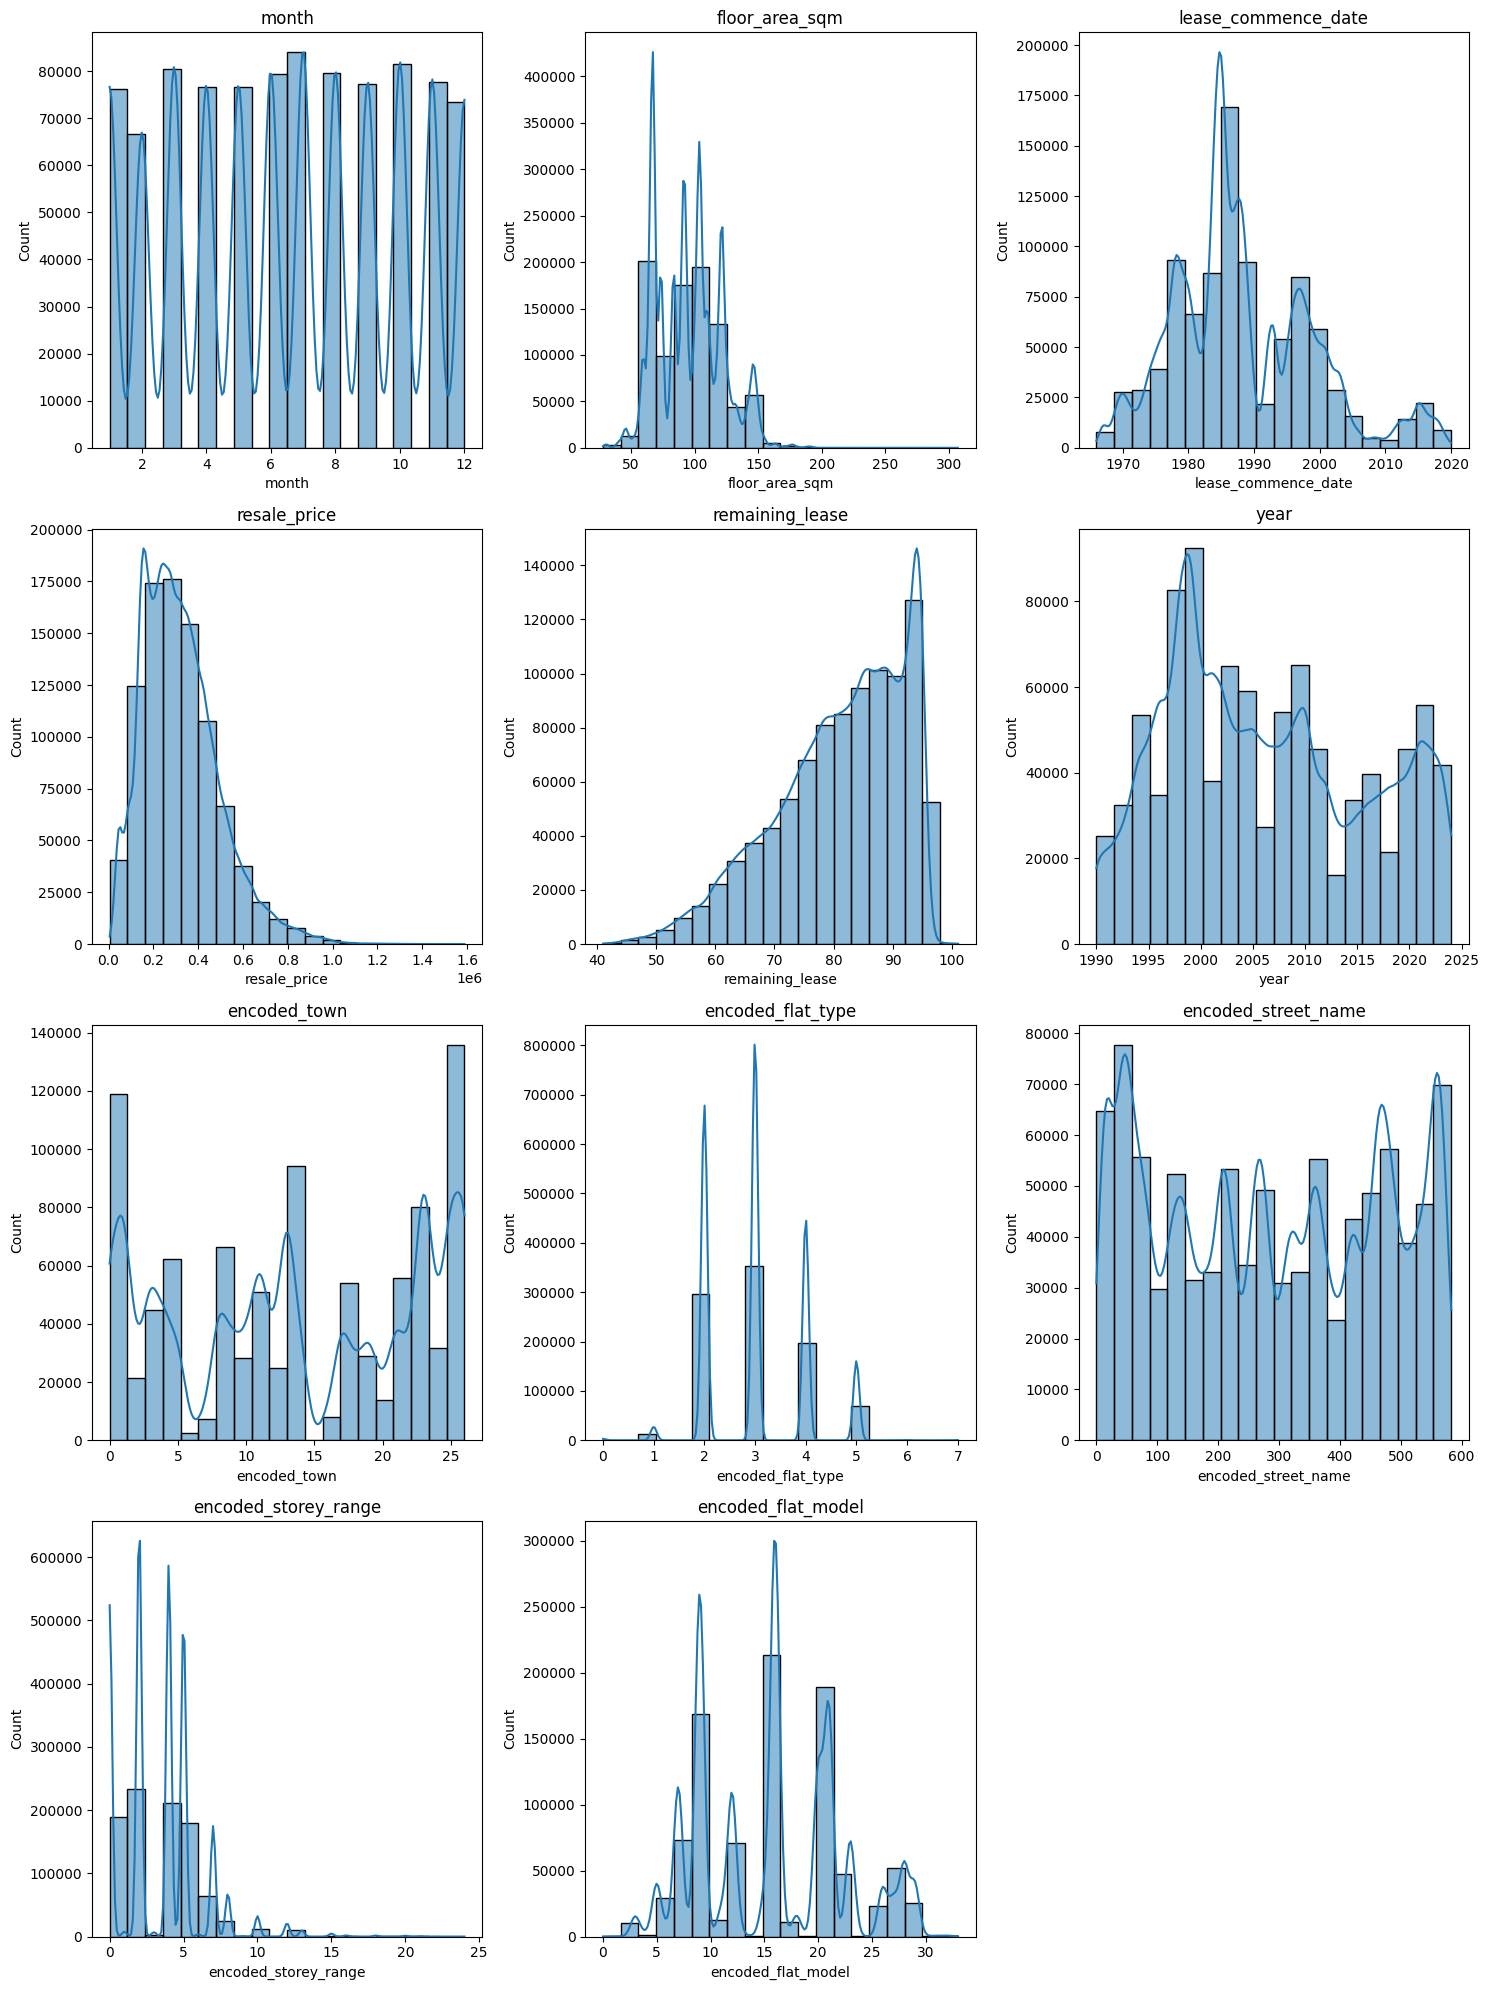

In [34]:
#Plotting the histogram of numerical columns
raw_numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in raw_numerical_columns]

nc_df = df1
num_plots = len(numerical_columns)
num_cols = min(num_plots, 3)  
num_rows = (num_plots - 1) // num_cols + 1 if num_plots > 1 else 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(numerical_columns):
    sns.histplot(nc_df[col], ax=axes[i], kde=True, bins=20)  # Adjust bins as needed
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show(fig)

In [35]:
X= numerical_columns1.drop(columns=['resale_price'])
y= numerical_columns1['resale_price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Name: {model1} :Mean absolute Error:{mae} // Root Mean Squared Error: {rmse:.2f} // R-squared (R2): {r2:.3f}")

Name: LinearRegression() :Mean absolute Error:61563.57873972412 // Root Mean Squared Error: 83349.86 // R-squared (R2): 0.763


In [41]:
model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Name: {model2} // Mean absolute Error:{mae} // Root Mean Squared Error: {rmse:.2f} // R-squared (R2): {r2:.3f}")

Name: DecisionTreeRegressor() // Mean absolute Error:19833.39493471419 // Root Mean Squared Error: 30524.68 // R-squared (R2): 0.968


In [42]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Name: {model3} // Mean absolute Error:{mae} // Root Mean Squared Error: {rmse:.2f} // R-squared (R2): {r2:.3f}")

Name: RandomForestRegressor() // Mean absolute Error:15117.647449687316 // Root Mean Squared Error: 22730.94 // R-squared (R2): 0.982


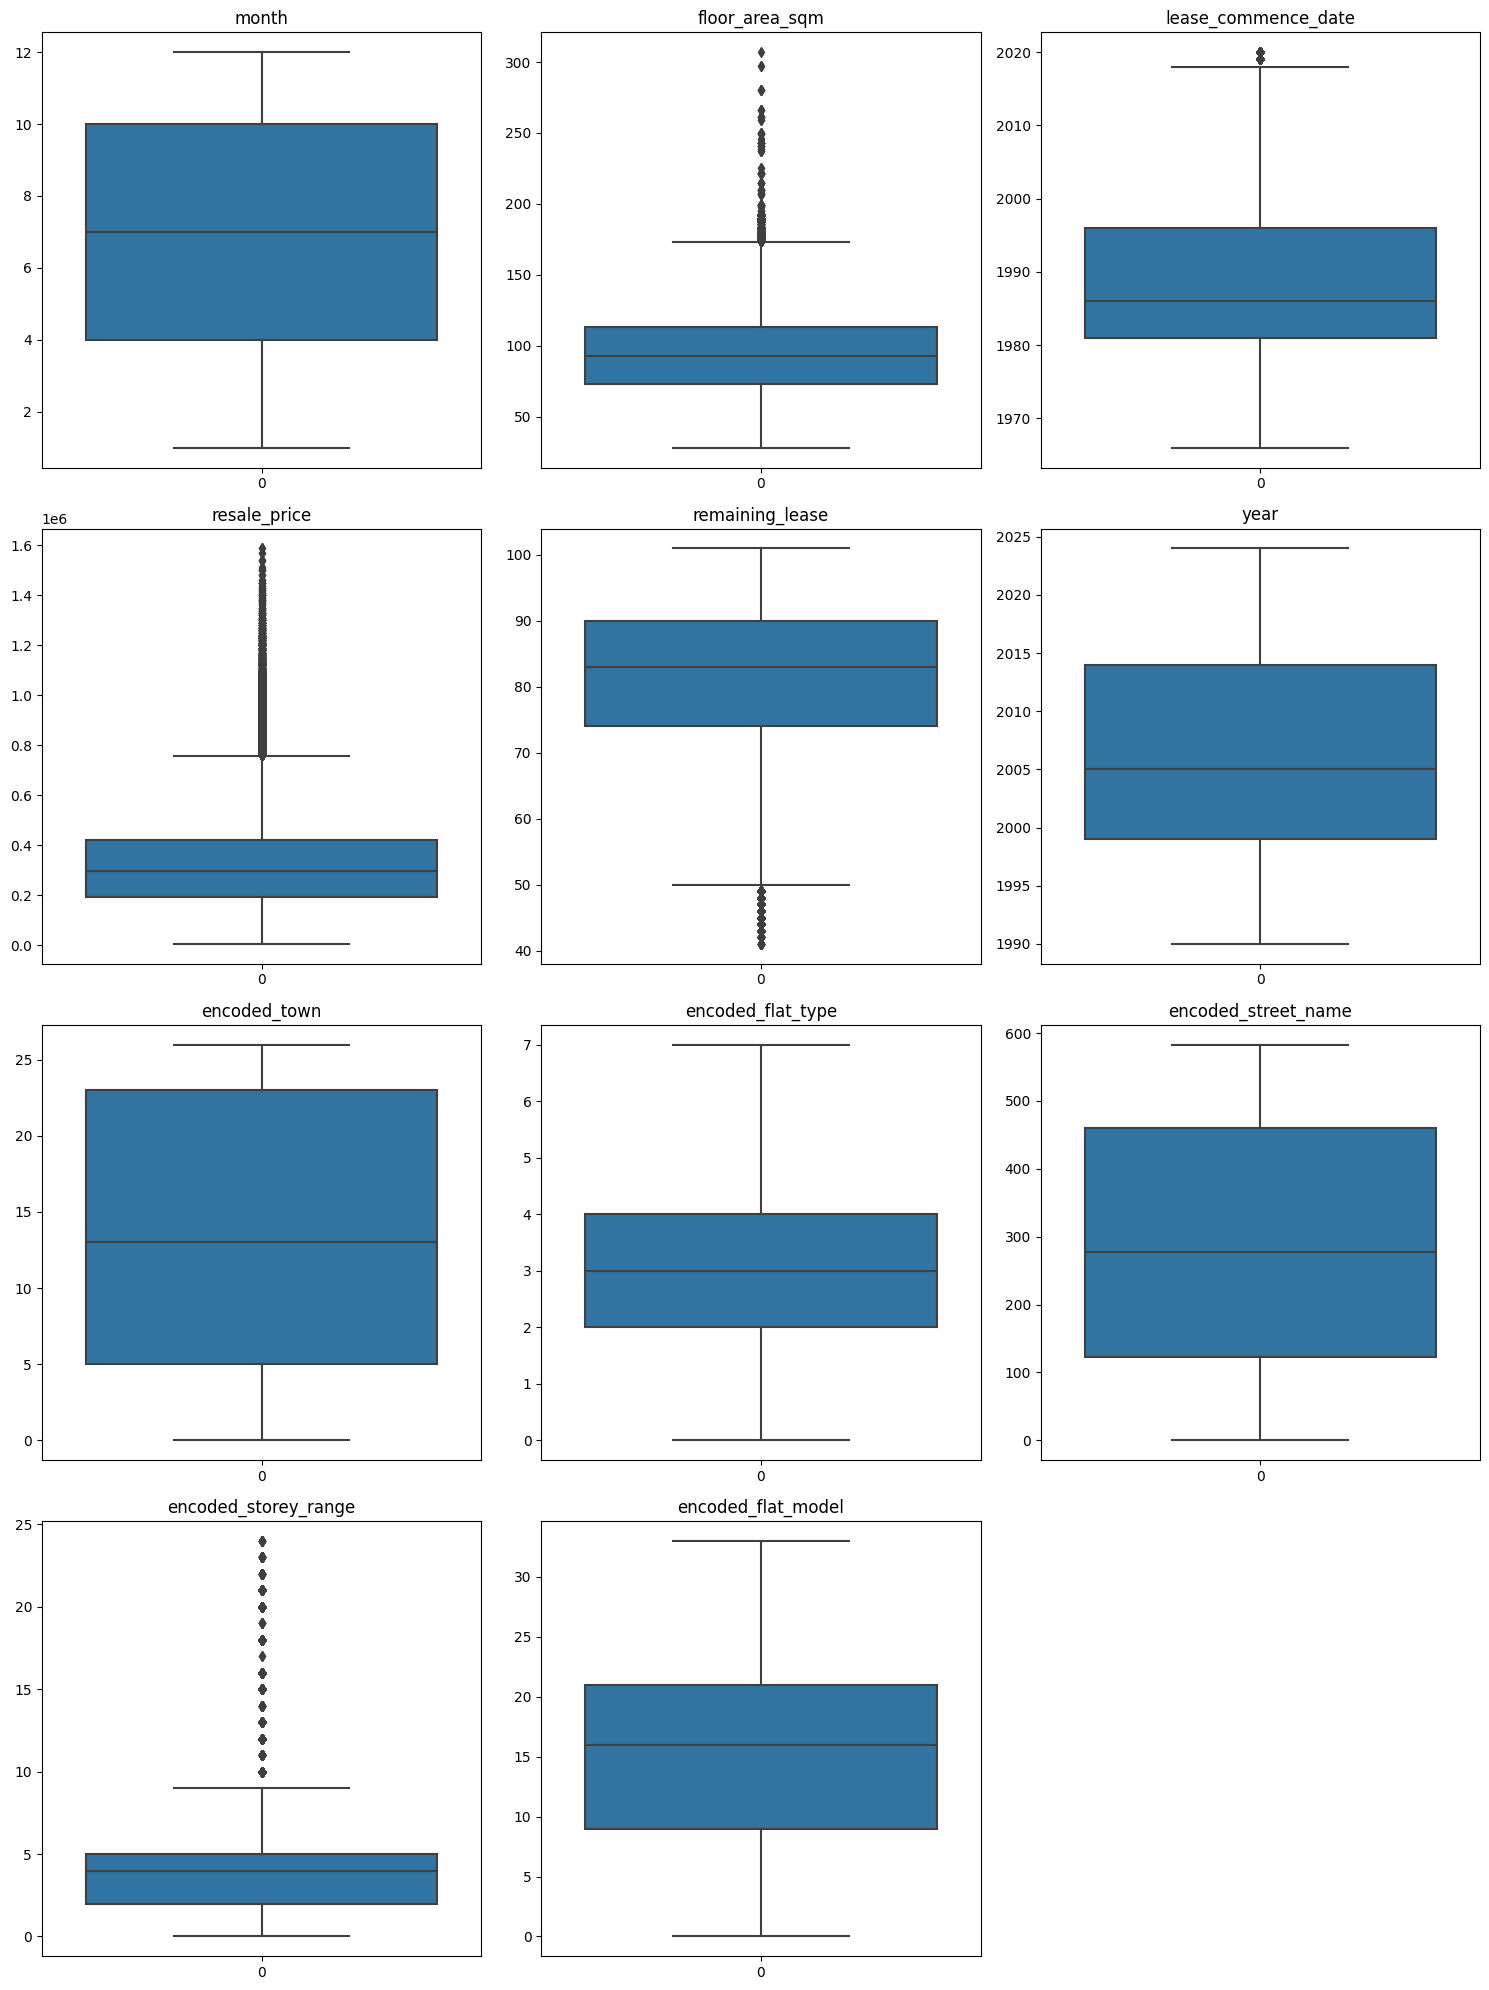

In [44]:
#Plotting the boxplot of numerical columns to check outliers
raw_numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in raw_numerical_columns]

nc_df = df1
num_plots = len(numerical_columns)
num_cols = min(num_plots, 3)  
num_rows = (num_plots - 1) // num_cols + 1 if num_plots > 1 else 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(numerical_columns):
    sns.boxplot(nc_df[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show(fig)

In [43]:
df1.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'encoded_town', 'encoded_flat_type',
       'encoded_street_name', 'encoded_storey_range', 'encoded_flat_model'],
      dtype='object')

<Axes: >

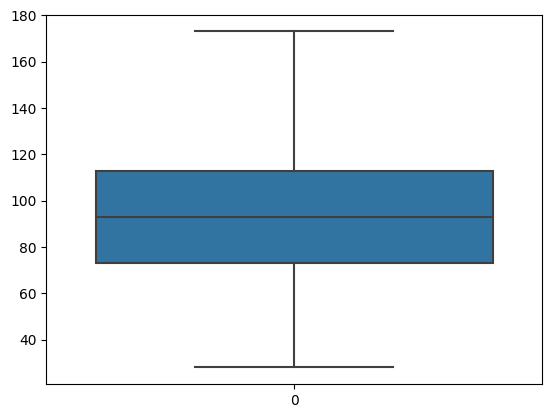

In [45]:
# Treating the outliers

Q1 = df1['floor_area_sqm'].quantile(0.25)
Q3 = df1['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df1['floor_area_sqm'] = df1['floor_area_sqm'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df1["floor_area_sqm"])

<Axes: >

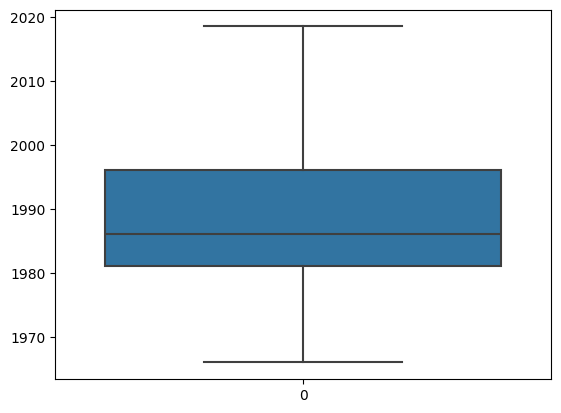

In [46]:
# Treating the outliers

Q1 = df1["lease_commence_date"].quantile(0.25)
Q3 = df1['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df1['lease_commence_date'] = df1['lease_commence_date'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df1['lease_commence_date'])

<Axes: >

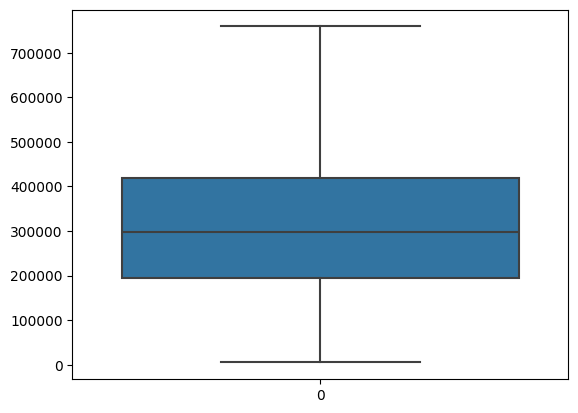

In [47]:
# Treating the outliers

Q1 = df1["resale_price"].quantile(0.25)
Q3 = df1['resale_price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df1['resale_price'] = df1['resale_price'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df1['resale_price'])

<Axes: >

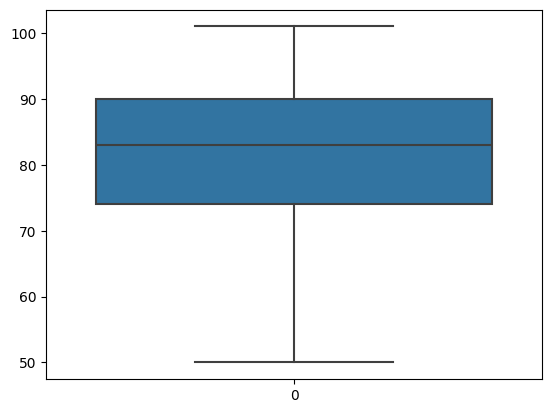

In [48]:
# Treating the outliers

Q1 = df1['remaining_lease'].quantile(0.25)
Q3 = df1['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df1['remaining_lease'] = df1['remaining_lease'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df1['remaining_lease'])

<Axes: >

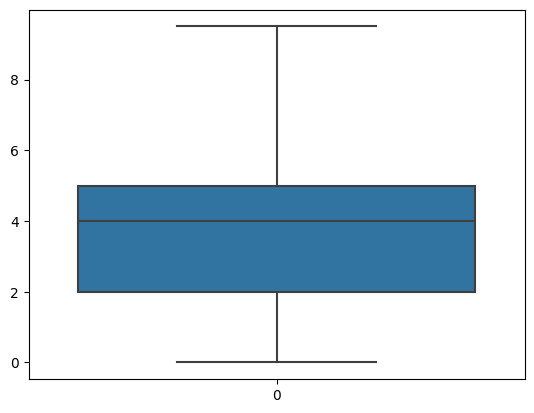

In [49]:
# Treating the outliers

Q1 = df1['encoded_storey_range'].quantile(0.25)
Q3 = df1['encoded_storey_range'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df1['encoded_storey_range'] = df1['encoded_storey_range'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df1['encoded_storey_range'])

In [50]:
#Skewness of features
skew_numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in skew_numerical_columns]
for i in numerical_columns:
    print('Skewness of:',i,skew(df1[i]))

Skewness of: month -0.02769690494485936
Skewness of: floor_area_sqm 0.3307141523226748
Skewness of: lease_commence_date 0.6484468161294278
Skewness of: resale_price 0.6520491782505642
Skewness of: remaining_lease -0.6905798743483936
Skewness of: year 0.29328355738138856
Skewness of: encoded_town -0.08654398729549438
Skewness of: encoded_flat_type 0.39721756034305805
Skewness of: encoded_street_name 0.022858877943434077
Skewness of: encoded_storey_range 0.3786799023254838
Skewness of: encoded_flat_model 0.20730046274637498


In [51]:
df2= df1.select_dtypes(include=['number'])
df2

,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,year,encoded_town,encoded_flat_type,encoded_street_name,encoded_storey_range,encoded_flat_model
0,1,31.0,1977.0,9000.0,86.0,1990,0,0,13,5.0,7
1,1,31.0,1977.0,6000.0,86.0,1990,0,0,13,2.0,7
2,1,31.0,1977.0,8000.0,86.0,1990,0,0,13,5.0,7
3,1,31.0,1977.0,6000.0,86.0,1990,0,0,13,4.0,7
4,1,73.0,1976.0,47200.0,85.0,1990,0,2,13,2.0,20
...,...,...,...,...,...,...,...,...,...,...,...
931334,7,146.0,1988.0,759000.0,63.0,2024,26,5,563,2.0,15
931335,7,145.0,1988.0,759000.0,63.0,2024,26,5,563,5.0,5
931336,7,146.0,1985.0,759000.0,60.0,2024,26,5,567,0.0,15
931337,7,146.0,1985.0,759000.0,60.0,2024,26,5,567,2.0,15


In [57]:
df2.columns

Index(['month', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'encoded_town', 'encoded_flat_type',
       'encoded_street_name', 'encoded_storey_range', 'encoded_flat_model'],
      dtype='object')

In [58]:
X= df2[['floor_area_sqm', 'lease_commence_date','year','encoded_flat_type','encoded_storey_range', 'encoded_flat_model']]
X

,floor_area_sqm,lease_commence_date,year,encoded_flat_type,encoded_storey_range,encoded_flat_model
0,31.0,1977.0,1990,0,5.0,7
1,31.0,1977.0,1990,0,2.0,7
2,31.0,1977.0,1990,0,5.0,7
3,31.0,1977.0,1990,0,4.0,7
4,73.0,1976.0,1990,2,2.0,20
...,...,...,...,...,...,...
931334,146.0,1988.0,2024,5,2.0,15
931335,145.0,1988.0,2024,5,5.0,5
931336,146.0,1985.0,2024,5,0.0,15
931337,146.0,1985.0,2024,5,2.0,15


In [60]:
X= df2[['floor_area_sqm', 'lease_commence_date','year','encoded_flat_type','encoded_storey_range', 'encoded_flat_model']]
y= df2['resale_price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Name: {model1} :Mean absolute Error:{mae} // Root Mean Squared Error: {rmse:.2f} // R-squared (R2): {r2:.3f}")

Name: RandomForestRegressor() :Mean absolute Error:30010.61393379086 // Root Mean Squared Error: 45355.90 // R-squared (R2): 0.923


In [68]:
df2.columns

Index(['month', 'floor_area_sqm', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'encoded_town', 'encoded_flat_type',
       'encoded_street_name', 'encoded_storey_range', 'encoded_flat_model'],
      dtype='object')

In [63]:
X= df2.drop("resale_price",axis=1)
y= df2['resale_price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Name: {model1} :Mean absolute Error:{mae} // Root Mean Squared Error: {rmse:.2f} // R-squared (R2): {r2:.3f}")

Name: RandomForestRegressor() :Mean absolute Error:14444.430053732294 // Root Mean Squared Error: 21018.86 // R-squared (R2): 0.984


In [65]:
# Save the Random Forest Classifier model
with open('predict_rf_model.pkl', 'wb') as file:
    pickle.dump(model1, file)

print("saved sucessfull")

saved sucessfull


In [66]:
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [67]:
with open('encoder.pkl', 'wb') as f2:
        pickle.dump(le, f2)

Prediction

input : month, floor_area_sqm, lease_commence_date, remaining_lease, year, town, flat_type, street_name, storey_range, flat_model